In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/Mnist png/mnist png archive.zip'


In [ ]:
import zipfile
import os

# Specific folder address
extract_path = '/content/drive/MyDrive/Mnist png'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("압축 해제 완료:", extract_path)


압축 해제 완료: /content/drive/MyDrive/Mnist png


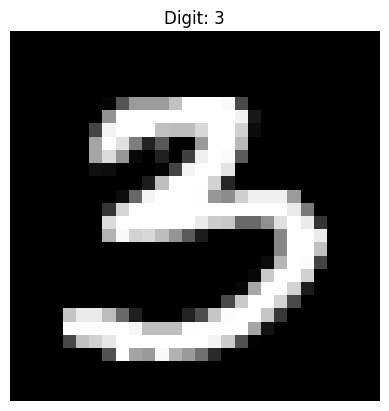

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Ex) Number 3 has been picked
image_path = os.path.join(extract_path, '/content/drive/MyDrive/Mnist png/mnist_png/mnist_png/training/3/16375.png')
img = Image.open(image_path).convert('L')

plt.imshow(img, cmap='gray')
plt.title("Digit: 3")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import os
from PIL import Image
from tqdm import tqdm

In [ ]:

base_dir = '/content/drive/MyDrive/Mnist png/mnist_png/mnist_png/training'

image_data = []
labels = []

for digit in range(10):
  digit_dir = os.path.join(base_dir, str(digit))
  for fname in tqdm(os.listdir(digit_dir)):
    img_path = os.path.join(digit_dir, fname)
    img = Image.open(img_path).convert('L')
    img_array = np.array(img)
    image_data.append(img_array)
    labels.append(digit)

X = np.array(image_data)
y = np.array(labels)


100%|██████████| 5949/5949 [03:58<00:00, 24.93it/s] 


In [ ]:
print("Total Images;", X.shape)
print("Image Pixel Size;", X.shape[1], "x", X.shape[2])
print("Labels Distribution", np.bincount(y))

Total Images; (60000, 28, 28)
Image Pixel Size; 28 x 28
Labels Distribution [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [ ]:
import matplotlib.pyplot as plt



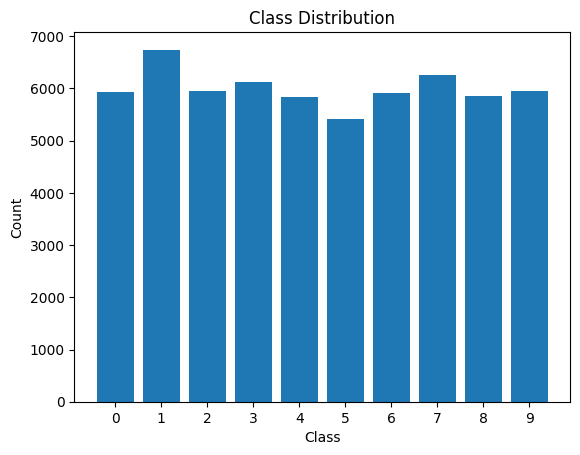

In [ ]:
classes, counts = np.unique(y, return_counts=True)
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(classes)
plt.show()

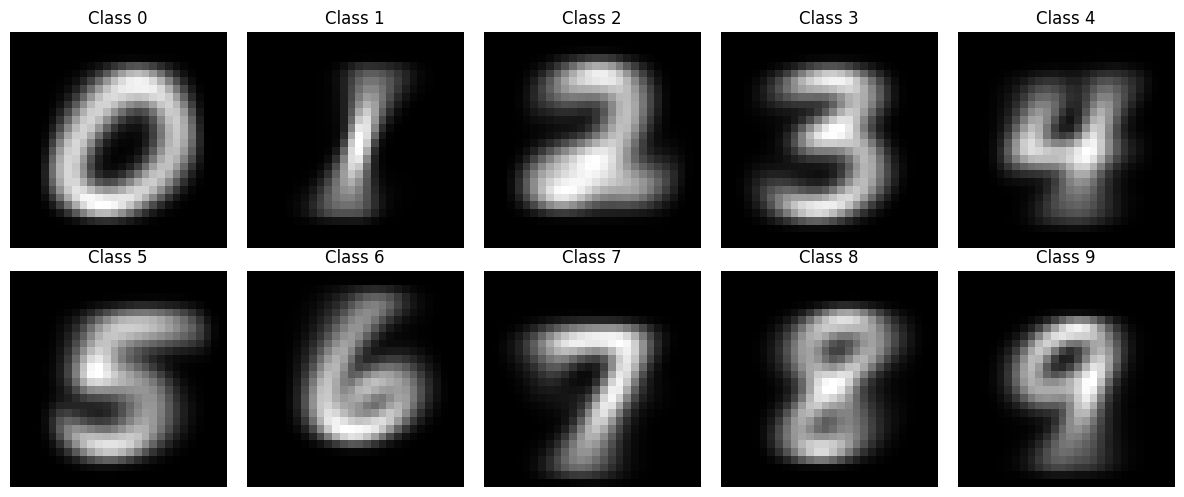

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
  avg_img = X[y == i].mean(axis=0)
  ax = axes[i // 5, i % 5]
  ax.imshow(avg_img, cmap='gray')
  ax.set_title(f'Class {i}')
  ax.axis('off')
plt.tight_layout()
plt.show()

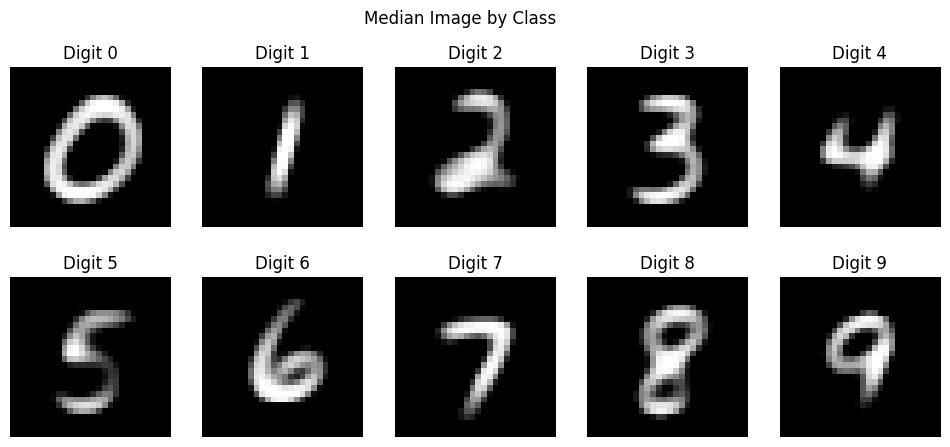

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    median_img = np.median(X[y == i], axis=0)
    ax = axes[i // 5, i % 5]
    ax.imshow(median_img, cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.suptitle("Median Image by Class")
plt.show()

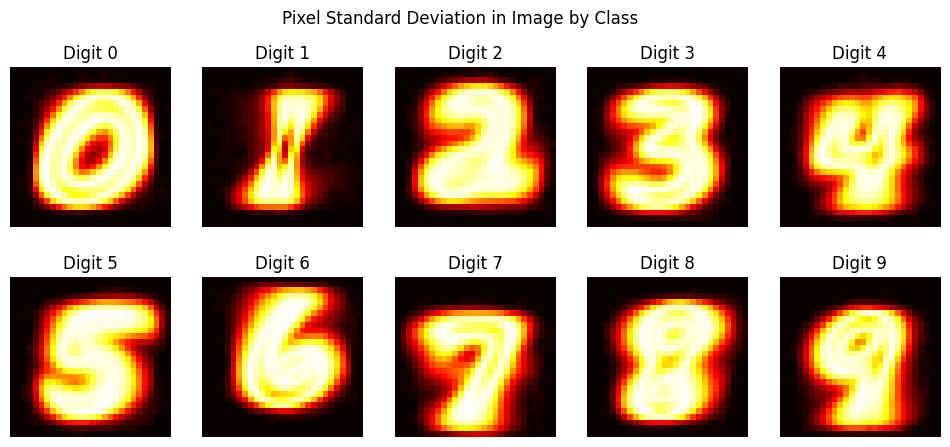

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    std_img = np.std(X[y == i], axis=0)
    ax = axes[i // 5, i % 5]
    ax.imshow(std_img, cmap='hot')  # 'hot' Brightest part has the largest deviation gap
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.suptitle("Pixel Standard Deviation in Image by Class")
plt.show()

In [ ]:
X_flat = X.reshape(len(X), -1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

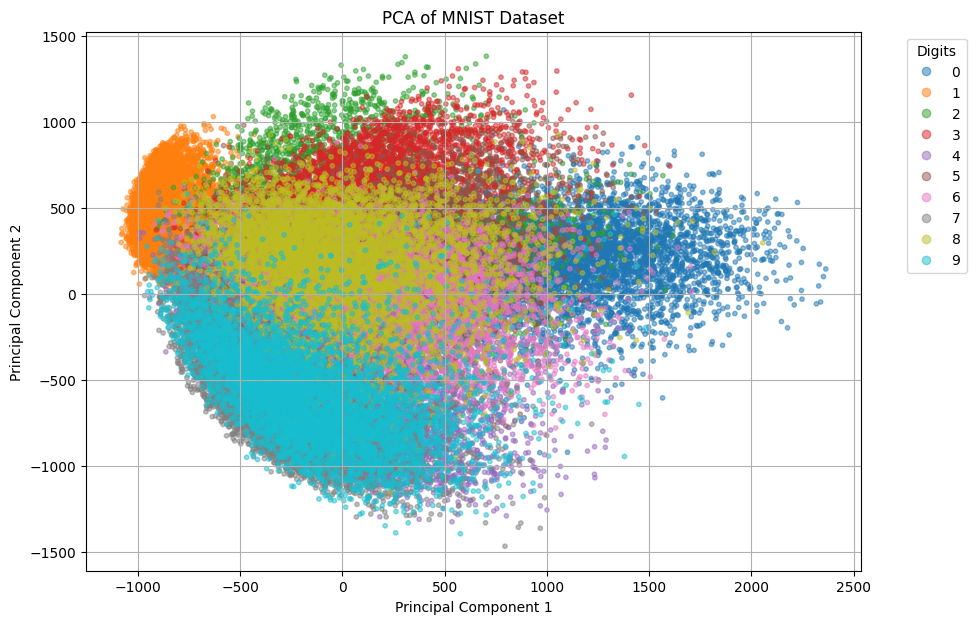

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5, s=10)
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset')
plt.grid(True)
plt.show()

In [ ]:
explained = pca.explained_variance_ratio_
print(f'Principal Component 1 explains {explained[0]*100:.2f}%')
print(f'Principal Component 2 explains {explained[1]*100:.2f}%')

Principal Component 1 explains 9.70%
Principal Component 2 explains 7.10%


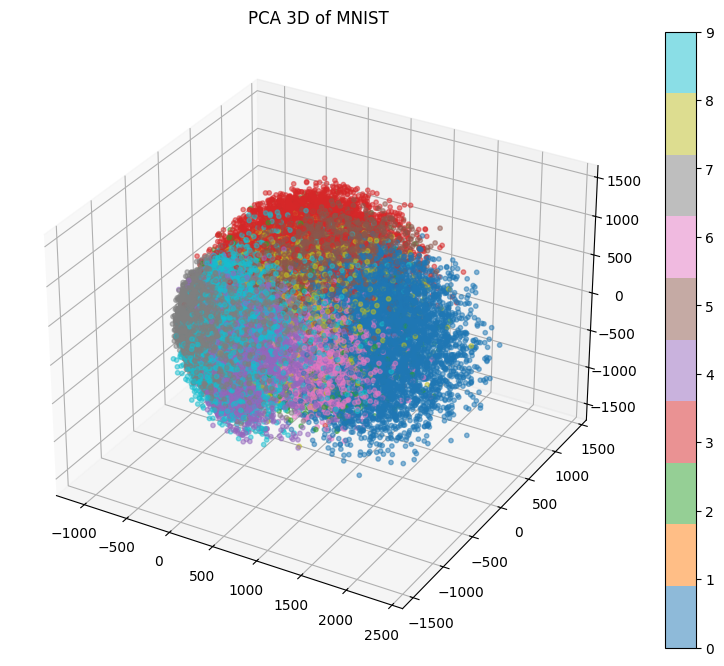

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


pca3d = PCA(n_components=3)
X_pca3d = pca3d.fit_transform(X_flat)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_pca3d[:, 0], X_pca3d[:, 1], X_pca3d[:, 2], c=y, cmap='tab10', s=10, alpha=0.5)
fig.colorbar(p, ax=ax)
ax.set_title("PCA 3D of MNIST")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


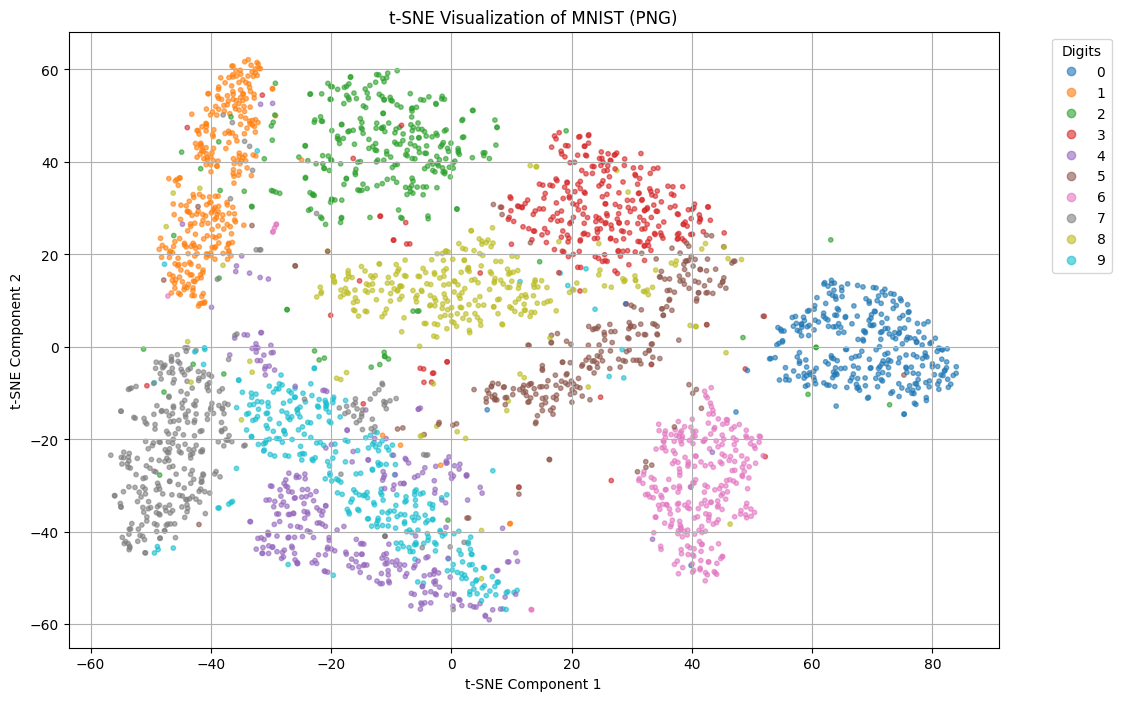

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Sampling 3000 used
sample_size = 3000
idx = np.random.choice(len(X), size=sample_size, replace=False)
X_sample = X[idx].reshape(sample_size, -1)  # (3000, 784)
y_sample = y[idx]

# t-SNE Adoption
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_sample)

# Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10', alpha=0.6, s=10)
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("t-SNE Visualization of MNIST (PNG)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()


In [ ]:
!pip install plotly

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import plotly.graph_objects as go

# Sample 3,000 points
sample_size = 3000
idx = np.random.choice(len(X), size=sample_size, replace=False)
X_sample = X[idx].reshape(sample_size, -1)
y_sample = y[idx]

# Run t-SNE with 3 components
tsne_3d = TSNE(n_components=3, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_sample)

# Create interactive 3D scatter plot with customization
fig = go.Figure(data=[go.Scatter3d(
    x=X_tsne_3d[:, 0],
    y=X_tsne_3d[:, 1],
    z=X_tsne_3d[:, 2],
    mode='markers',
    marker=dict(
        size=2,                # smaller dot size
        color=y_sample,        # color by digit class
        colorscale='Turbo',    # vibrant color scale
        opacity=0.6
    ),
    text=[f"Digit: {label}" for label in y_sample],  # hover text
)])

fig.update_layout(
    scene=dict(
        xaxis_title='t-SNE 1',
        yaxis_title='t-SNE 2',
        zaxis_title='t-SNE 3'
    ),
    title=" 3D t-SNE of MNIST Digits (3000 samples)",
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()
#clustering distribution analysis~
#understanding in PCA and t-SNE when to use it and the reason to use it




/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import os
from PIL import Image
import numpy as np
from tqdm import tqdm
from torch.optim import AdamW

In [ ]:
base_dir = '/content/drive/MyDrive/Mnist png/mnist_png/mnist_png/training'

image_data = []
labels = []

for digit in range(10):
  digit_dir = os.path.join(base_dir, str(digit))
  for fname in tqdm(os.listdir(digit_dir)):
    img_path = os.path.join(digit_dir, fname)
    img = Image.open(img_path).convert('L')
    img_array = np.array(img)
    image_data.append(img_array)
    labels.append(digit)

X = np.array(image_data)
y = np.array(labels)

100%|██████████| 5949/5949 [02:38<00:00, 37.44it/s] 


In [ ]:
# Save
np.savez('/content/drive/MyDrive/Mnist png/MLP모델 저장/mnist_data.npz', X=X, y=y)


In [ ]:
# Load
data = np.load('/content/drive/MyDrive/Mnist png/MLP모델 저장/mnist_data.npz')
X = data['X']
y = data['y']

In [ ]:
# Normalize
X = X / 255.0

# For MLP: Flatten (N, 28*28), For CNN: Add channel (N, 1, 28, 28)
X_mlp = torch.tensor(X.reshape(-1, 28 * 28), dtype=torch.float32)
X_cnn = torch.tensor(X.reshape(-1, 1, 28, 28), dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split train/test
dataset_mlp = TensorDataset(X_mlp, y_tensor)
dataset_cnn = TensorDataset(X_cnn, y_tensor)

train_size = int(0.9 * len(X))
validation_size = len(X) - train_size

train_dataset_mlp, validation_size_mlp = random_split(dataset_mlp, [train_size, validation_size])
train_dataset_cnn, validation_size_cnn = random_split(dataset_cnn, [train_size, validation_size])

In [ ]:
train_loader_mlp = DataLoader(train_dataset_mlp, batch_size=64, shuffle=True)
validation_loader_mlp = DataLoader(validation_size_mlp, batch_size=64)

train_loader_cnn = DataLoader(train_dataset_cnn, batch_size=64, shuffle=True)
validation_loader_cnn = DataLoader(validation_size_cnn, batch_size=64)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2, training=self.training)
        x = F.relu(self.fc2(x))
        return self.out(x)


In [ ]:
def train_with_logs(model, train_loader, val_loader, optimizer, criterion, device, epochs=10):
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

    for epoch in range(epochs):
        # 🔁 Train
        model.train()
        total_loss, total_correct, total_samples = 0, 0, 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.size(0)
            total_correct += (output.argmax(1) == target).sum().item()
            total_samples += data.size(0)

        train_loss = total_loss / total_samples
        train_acc = total_correct / total_samples

        # 🔁 Validation
        model.eval()
        val_loss, val_correct, val_samples = 0, 0, 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item() * data.size(0)
                val_correct += (output.argmax(1) == target).sum().item()
                val_samples += data.size(0)

        val_loss /= val_samples
        val_acc = val_correct / val_samples

        # 📊 Log save
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f"Epoch {epoch+1:2d}: "
              f"Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f} | "
              f"Val Loss={val_loss:.4f}, Val Acc={val_acc:.4f}")

    return history



In [ ]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(14, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()
    plt.grid(True)

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], label='Train Accuracy')
    plt.plot(epochs, history['val_acc'], label='Validation Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


Epoch  1: Train Loss=0.3121, Train Acc=0.9093 | Val Loss=0.1583, Val Acc=0.9498
Epoch  2: Train Loss=0.1304, Train Acc=0.9599 | Val Loss=0.1124, Val Acc=0.9647
Epoch  3: Train Loss=0.0924, Train Acc=0.9712 | Val Loss=0.0922, Val Acc=0.9727
Epoch  4: Train Loss=0.0744, Train Acc=0.9761 | Val Loss=0.0896, Val Acc=0.9732
Epoch  5: Train Loss=0.0615, Train Acc=0.9799 | Val Loss=0.0829, Val Acc=0.9763
Epoch  6: Train Loss=0.0509, Train Acc=0.9838 | Val Loss=0.0837, Val Acc=0.9755
Epoch  7: Train Loss=0.0452, Train Acc=0.9853 | Val Loss=0.0868, Val Acc=0.9752
Epoch  8: Train Loss=0.0397, Train Acc=0.9872 | Val Loss=0.0799, Val Acc=0.9787
Epoch  9: Train Loss=0.0365, Train Acc=0.9886 | Val Loss=0.0787, Val Acc=0.9787
Epoch 10: Train Loss=0.0313, Train Acc=0.9894 | Val Loss=0.0887, Val Acc=0.9782


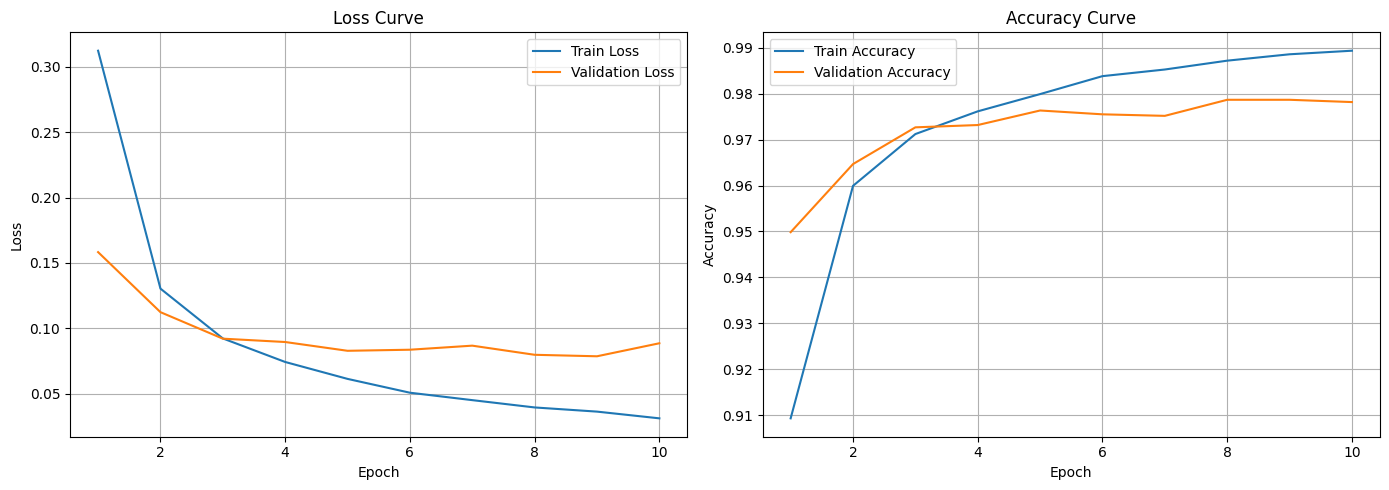

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Model, Optimization Define
mlp_model = MLP().to(device)
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training Execution
history = train_with_logs(mlp_model, train_loader_mlp, validation_loader_mlp, optimizer, criterion, device, epochs=10)

# Graph Visualization
plot_training_curves(history)



In [ ]:
torch.save(mlp_model.state_dict(), "/content/drive/MyDrive/Mnist png/MLP모델 저장/model_weights.pth")


In [ ]:
mlp_model = MLP()               # Re-define the model needed here
mlp_model.load_state_dict(torch.load("/content/drive/MyDrive/Mnist png/MLP모델 저장/model_weights.pth"))


<All keys matched successfully>

In [ ]:
import os
import random
import shutil
from pathlib import Path

# Source root setting
source_roots = [
    "/content/drive/MyDrive/Mnist png/mnist_png/mnist_png/testing"
]

# Output folder
target_dir = "/content/drive/MyDrive/Mnist png/mnist_png/mnist_png/testing/Inference #1"
os.makedirs(target_dir, exist_ok=True)

samples_per_digit = 20  # The number of samples of each number
sampled_images = []

for digit in range(10):
    digit_images = []

    # Collect number folder as it looks around source root
    for root in source_roots:
        digit_dir = os.path.join(root, str(digit))
        if not os.path.isdir(digit_dir):
            continue
        files = [os.path.join(digit_dir, f) for f in os.listdir(digit_dir) if f.endswith(".png")]
        digit_images.extend(files)

    # Random sampling
    if len(digit_images) < samples_per_digit:
        raise ValueError(f"❌ 숫자 {digit}에 대해 총 이미지 수 부족: {len(digit_images)}장")

    sampled = random.sample(digit_images, samples_per_digit)
    sampled_images.extend(sampled)

# Shuffle sampled images
random.shuffle(sampled_images)

# Save
for i, img_path in enumerate(sampled_images):
    label = Path(img_path).parent.name
    filename = f"{i:04d}_{label}.png"
    shutil.copy(img_path, os.path.join(target_dir, filename))

print(f"✅ {len(sampled_images)}개 이미지가 '{target_dir}'에 저장되었습니다.")



✅ 200개 이미지가 '/content/drive/MyDrive/Mnist png/mnist_png/mnist_png/testing/Inference #1'에 저장되었습니다.


In [ ]:
import os
from PIL import Image
import numpy as np

def load_images_from_folder(folder_path):
    images = []
    filenames = []

    for fname in sorted(os.listdir(folder_path)):
        if fname.lower().endswith('.png'):
            path = os.path.join(folder_path, fname)
            img = Image.open(path).convert('L').resize((28, 28))
            img_array = np.array(img) / 255.0
            images.append(img_array)
            filenames.append(fname)
    return np.array(images), filenames


In [ ]:
import torch

def predict_batch_images(model, images_np, device):
    model.eval()
    with torch.no_grad():
        # (N, 28, 28) → (N, 784) flatten
        if len(images_np.shape) == 3:
            images_np = images_np.reshape(images_np.shape[0], -1)

        # Input to device
        inputs = torch.tensor(images_np, dtype=torch.float32).to(device)

        # model needs to be set as .to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)

    return preds.cpu().numpy()




In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:


# Google Drive path setting
folder_path = '/content/drive/MyDrive/Mnist png/mnist_png/mnist_png/testing/Inference #1'

# Image load
images_np, filenames = load_images_from_folder(folder_path)

# Model needs to be moved to to(device) to match GPU mode
mlp_model = mlp_model.to(device)  # Important

# Prediction
preds = predict_batch_images(mlp_model, images_np, device)

# Result output
for fname, pred in zip(filenames, preds):
    print(f"{fname} → Predicted numbers: {pred}")


0000_0.png → 예측된 숫자: 0
0001_9.png → 예측된 숫자: 9
0002_1.png → 예측된 숫자: 1
0003_4.png → 예측된 숫자: 4
0004_5.png → 예측된 숫자: 6
0005_7.png → 예측된 숫자: 7
0006_6.png → 예측된 숫자: 6
0007_4.png → 예측된 숫자: 9
0008_3.png → 예측된 숫자: 3
0009_1.png → 예측된 숫자: 1
0010_4.png → 예측된 숫자: 4
0011_7.png → 예측된 숫자: 7
0012_1.png → 예측된 숫자: 1
0013_2.png → 예측된 숫자: 2
0014_0.png → 예측된 숫자: 0
0015_7.png → 예측된 숫자: 7
0016_0.png → 예측된 숫자: 0
0017_5.png → 예측된 숫자: 5
0018_0.png → 예측된 숫자: 0
0019_9.png → 예측된 숫자: 9
0020_1.png → 예측된 숫자: 1
0021_1.png → 예측된 숫자: 1
0022_1.png → 예측된 숫자: 1
0023_6.png → 예측된 숫자: 6
0024_6.png → 예측된 숫자: 6
0025_1.png → 예측된 숫자: 1
0026_2.png → 예측된 숫자: 2
0027_9.png → 예측된 숫자: 9
0028_2.png → 예측된 숫자: 2
0029_5.png → 예측된 숫자: 5
0030_2.png → 예측된 숫자: 2
0031_6.png → 예측된 숫자: 6
0032_3.png → 예측된 숫자: 3
0033_4.png → 예측된 숫자: 4
0034_9.png → 예측된 숫자: 9
0035_7.png → 예측된 숫자: 7
0036_8.png → 예측된 숫자: 8
0037_0.png → 예측된 숫자: 0
0038_8.png → 예측된 숫자: 8
0039_7.png → 예측된 숫자: 7
0040_1.png → 예측된 숫자: 1
0041_1.png → 예측된 숫자: 1
0042_3.png → 예측된 숫자: 3
0043_0.png 

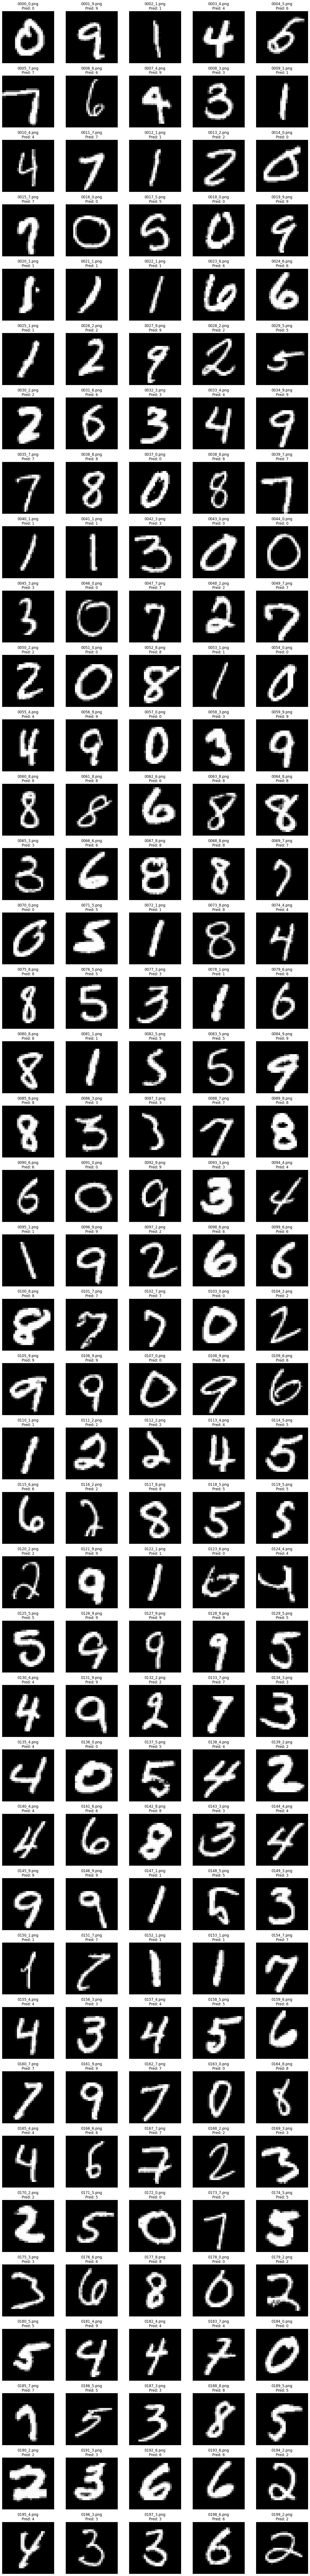

In [ ]:
import matplotlib.pyplot as plt

n = len(images_np)
cols = min(n, 5)
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 3, rows * 3))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images_np[i], cmap='gray')
    plt.title(f"{filenames[i]}\nPred: {preds[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def predict_for_confusion_matrix(model, X, device):
    model.eval()
    with torch.no_grad():
        if len(X.shape) == 3:  # (N, 28, 28)
            # Check if it's CNN
            is_cnn = any(hasattr(m, 'weight') and m.weight.dim() == 4 for m in model.modules())
            if is_cnn:
                inputs = torch.tensor(X, dtype=torch.float32).unsqueeze(1).to(device)  # For CNN: (N, 1, 28, 28)
            else:
                inputs = torch.tensor(X.reshape(len(X), -1), dtype=torch.float32).to(device)  # For MLP: (N, 784)
        else:
            inputs = torch.tensor(X, dtype=torch.float32).to(device)

        outputs = model(inputs)
        preds = outputs.argmax(dim=1).cpu().numpy()
    return preds


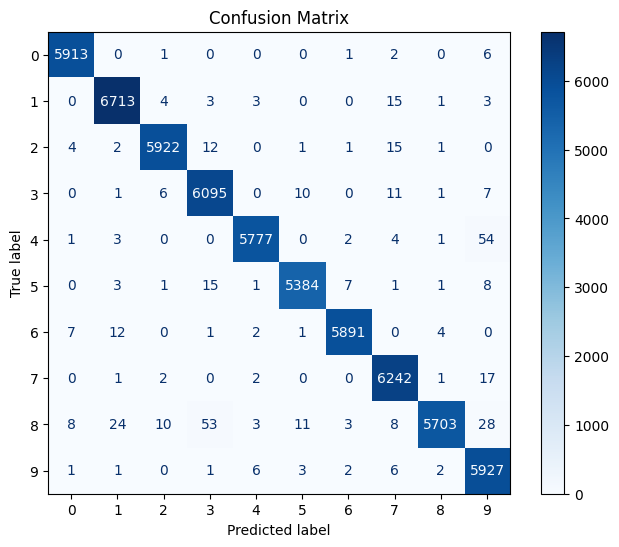

In [ ]:
# Ground truth: y
# Prediction result: y_pred
mlp_model = mlp_model.to(device)
y_pred = predict_for_confusion_matrix(mlp_model, X, device)

# Confusion matrix calculation
cm = confusion_matrix(y, y_pred)

# Visualizaiton
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [ ]:
# Prediction (기존에 정의한 함수 사용)
y_pred = predict_for_confusion_matrix(mlp_model, X, device)


In [ ]:
print(classification_report(y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9965    0.9983    0.9974      5923
           1     0.9930    0.9957    0.9944      6742
           2     0.9960    0.9940    0.9950      5958
           3     0.9862    0.9941    0.9902      6131
           4     0.9971    0.9889    0.9930      5842
           5     0.9952    0.9932    0.9942      5421
           6     0.9973    0.9954    0.9964      5918
           7     0.9902    0.9963    0.9932      6265
           8     0.9979    0.9747    0.9862      5851
           9     0.9797    0.9963    0.9879      5949

    accuracy                         0.9928     60000
   macro avg     0.9929    0.9927    0.9928     60000
weighted avg     0.9928    0.9928    0.9928     60000

